# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# VGG11 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10.tnt_solver import *
from cifar10.classifiers.vgg import VGG11

model = VGG11()
print(model)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=2

# train VGG11


In [3]:
%%time
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = F.cross_entropy
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)

# lr_scheduler = None
history = main(model, opt, epoch=150, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/150, lr:1.00e-01
100%|██████████| 625/625 [00:22<00:00, 27.32it/s, loss:2.0628, acc:20.9125%]
Val loss: 1.7782, accuracy: 29.83%
Epoch: 2/150, lr:1.00e-01
100%|██████████| 625/625 [00:22<00:00, 27.30it/s, loss:1.5219, acc:42.6925%]
Val loss: 1.2773, accuracy: 53.01%
Epoch: 3/150, lr:1.00e-01
100%|██████████| 625/625 [00:22<00:00, 27.43it/s, loss:1.2227, acc:55.9400%]
Val loss: 1.1930, accuracy: 57.96%
Epoch: 4/150, lr:1.00e-01
100%|██████████| 625/625 [00:22<00:00, 27.39it/s, loss:1.0691, acc:62.1850%]
Val loss: 1.1879, accuracy: 58.27%
Epoch: 5/150, lr:1.00e-01
100%|██████████| 625/625 [00:23<00:00, 27.17it/s, loss:0.9642, acc:66.4700%]
Val loss: 1.1190, accuracy: 62.89%
Epoch: 6/150, lr:1.00e-01
100%|██████████| 625/625 [00:22<00:00, 27.28it/s, loss:0.8833, acc:69.7425%]
Val loss: 1.0912, accuracy: 62.18%
Epoch: 7/150, lr:1.00e-01
100%|██████████| 625/625 [00:38<

100%|██████████| 625/625 [01:04<00:00,  9.67it/s, loss:0.0420, acc:98.6050%]
Val loss: 0.3382, accuracy: 90.69%
Epoch: 60/150, lr:3.13e-03
100%|██████████| 625/625 [01:04<00:00,  9.72it/s, loss:0.0355, acc:98.8275%]
Val loss: 0.3433, accuracy: 90.60%
Epoch: 61/150, lr:3.13e-03
100%|██████████| 625/625 [01:04<00:00,  9.74it/s, loss:0.0306, acc:99.0175%]
Val loss: 0.3609, accuracy: 90.62%
Epoch: 62/150, lr:3.13e-03
100%|██████████| 625/625 [01:03<00:00,  9.77it/s, loss:0.0322, acc:98.9550%]
Val loss: 0.3493, accuracy: 90.60%
Epoch: 63/150, lr:3.13e-03
100%|██████████| 625/625 [01:04<00:00,  9.71it/s, loss:0.0333, acc:98.8725%]
Val loss: 0.3775, accuracy: 90.08%
Epoch: 64/150, lr:3.13e-03
100%|██████████| 625/625 [01:04<00:00,  9.76it/s, loss:0.0311, acc:98.9850%]
Val loss: 0.3731, accuracy: 90.31%
Epoch: 65/150, lr:3.13e-03
100%|██████████| 625/625 [01:04<00:00,  9.73it/s, loss:0.0327, acc:98.9225%]
Val loss: 0.3993, accuracy: 89.72%
Epoch: 66/150, lr:3.13e-03
100%|██████████| 625/625 [0

100%|██████████| 625/625 [01:03<00:00,  9.84it/s, loss:0.0036, acc:99.9400%]
Val loss: 0.3475, accuracy: 91.50%
Epoch: 119/150, lr:9.77e-05
100%|██████████| 625/625 [01:03<00:00,  9.81it/s, loss:0.0035, acc:99.9325%]
Val loss: 0.3455, accuracy: 91.69%
Epoch: 120/150, lr:9.77e-05
100%|██████████| 625/625 [01:04<00:00,  9.74it/s, loss:0.0033, acc:99.9400%]
Val loss: 0.3473, accuracy: 91.70%
Epoch: 121/150, lr:9.77e-05
100%|██████████| 625/625 [01:03<00:00,  9.81it/s, loss:0.0033, acc:99.9375%]
Val loss: 0.3458, accuracy: 91.68%
Epoch: 122/150, lr:9.77e-05
100%|██████████| 625/625 [01:03<00:00,  9.81it/s, loss:0.0036, acc:99.9225%]
Val loss: 0.3442, accuracy: 91.74%
Epoch: 123/150, lr:4.88e-05
100%|██████████| 625/625 [01:03<00:00,  9.78it/s, loss:0.0032, acc:99.9675%]
Val loss: 0.3463, accuracy: 91.73%
Epoch: 124/150, lr:4.88e-05
100%|██████████| 625/625 [01:03<00:00,  9.79it/s, loss:0.0031, acc:99.9600%]
Val loss: 0.3489, accuracy: 91.62%
Epoch: 125/150, lr:4.88e-05
100%|██████████| 625

# plot VGG11 loss history
We check the classifier by plotting the loss and acc.

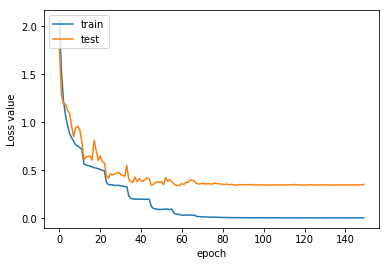

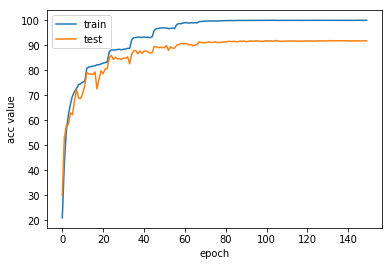

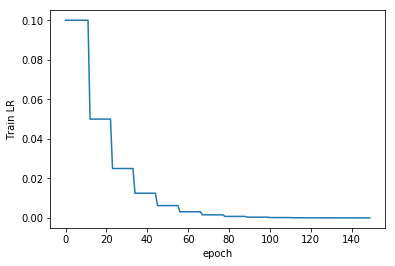

In [4]:
plot_history(history)